# Seminar Project on Solving Big Data Problems "Which employee will leave the company next?"

Corporation X with 14999 data on employees (anonymous data obtained from Kaggle)
Task: predict using ML algorithms which employee will leave the company before it happens.


### Introductory remarks about the data

Observations: 
- Satisfaction (satisfaction_level)
- Last review (last_evaluation)
- Number of projects done by employees (number_project)
- Average working hours per month (average_montly_hours)
- Entry Time (time_spend_company)
- Whether there is a work accident (Work_accident)
- Have you been promoted in the last five years (promotion_last_5years)
- Staff department (department)
- Salary level (salary)
- Resign (left)

### Loading required packages for Data Analytics

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import scipy as scs
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import log_loss

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import logit

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\khari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Read and prepare the data

In [4]:
df = pd.read_csv("D://Uni Siegen//WS 21-22//Solving Big Data Problems//HR.bak.csv") 
df.head() # display the rows

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Display dataset shape
df.shape

(14999, 10)

In [4]:
# Display descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [5]:
# Display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# It seems that data do not have non-null values. Let's chek it one more time

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Visual exploration
Before starting the regression analysis let's have a look how the data are distributed and if there are any obvious outliers. 

In [75]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

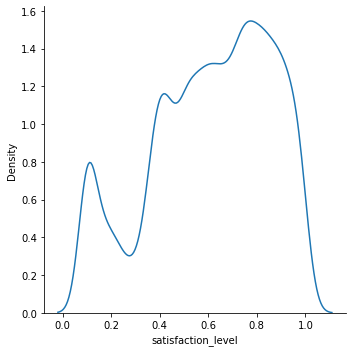

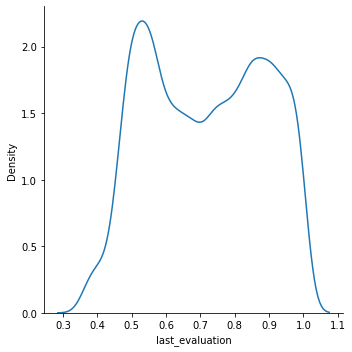

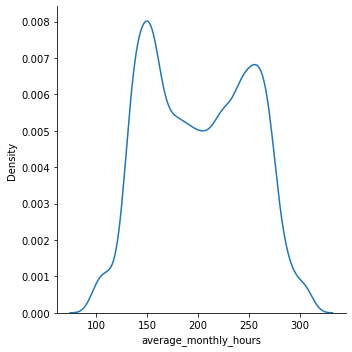

In [8]:
sns.displot(df, x="satisfaction_level", kind="kde")
sns.displot(df, x="last_evaluation", kind="kde")
sns.displot(df, x="average_monthly_hours", kind="kde")

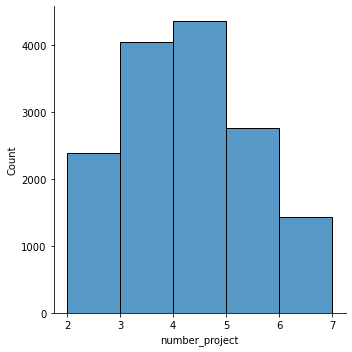

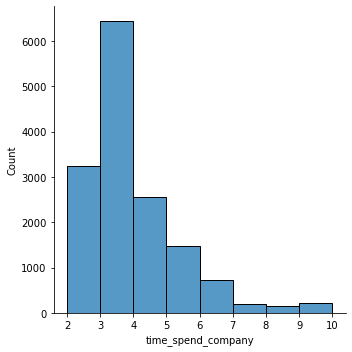

In [9]:
sns.displot(df, x='number_project', binwidth=1)
sns.displot(df, x="time_spend_company", binwidth=1)

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

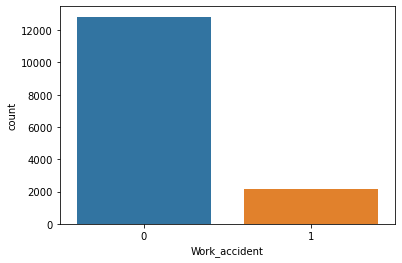

In [10]:
sns.countplot(x=df['Work_accident'])

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

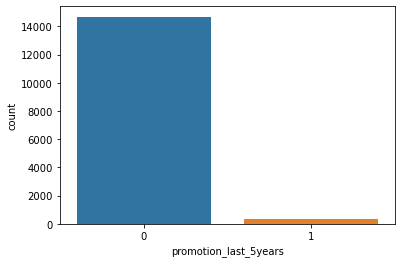

In [11]:
sns.countplot(x=df['promotion_last_5years'])

<AxesSubplot:xlabel='left', ylabel='count'>

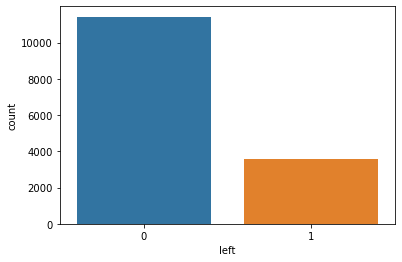

In [12]:
sns.countplot(x=df.left)

<AxesSubplot:xlabel='time_spend_company', ylabel='left'>

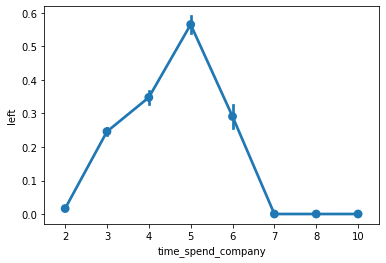

In [13]:
sns.pointplot(x='time_spend_company', y='left', data=df)

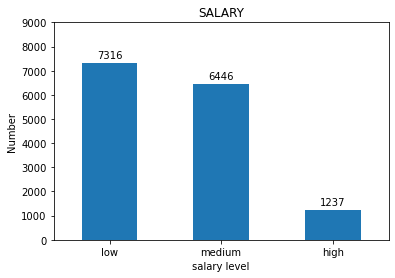

In [21]:
# Bar graph
plt.title('SALARY')

# Graphic color
plt.xlabel('salary level')
plt.ylabel('Number')
plt.xticks(np.arange(len(df['salary'].value_counts())), df['salary'].value_counts().index)
# Set x, y axis range
plt.axis([-0.5, 2.5, 0, 9000])
# X-axis chart corresponding name
plt.bar(np.arange(len(df['salary'].value_counts())), df['salary'].value_counts(), width=0.5)
# Mark the corresponding number
for x, y in zip(np.arange(len(df['salary'].value_counts())), df['salary'].value_counts()):
    plt.text(x, y+100, y, ha='center', va='bottom')
plt.show()

In [22]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [16]:
# NEED TO MELT DATA FRAME IN ORDER TO BE ABLE TO BUILD BEATIFUL HIST
#sns.histplot(data=df, x="Count", hue="department")

In [6]:
# Prepare data for correlation
df_corr = df.iloc[:,0:8]
df_corr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

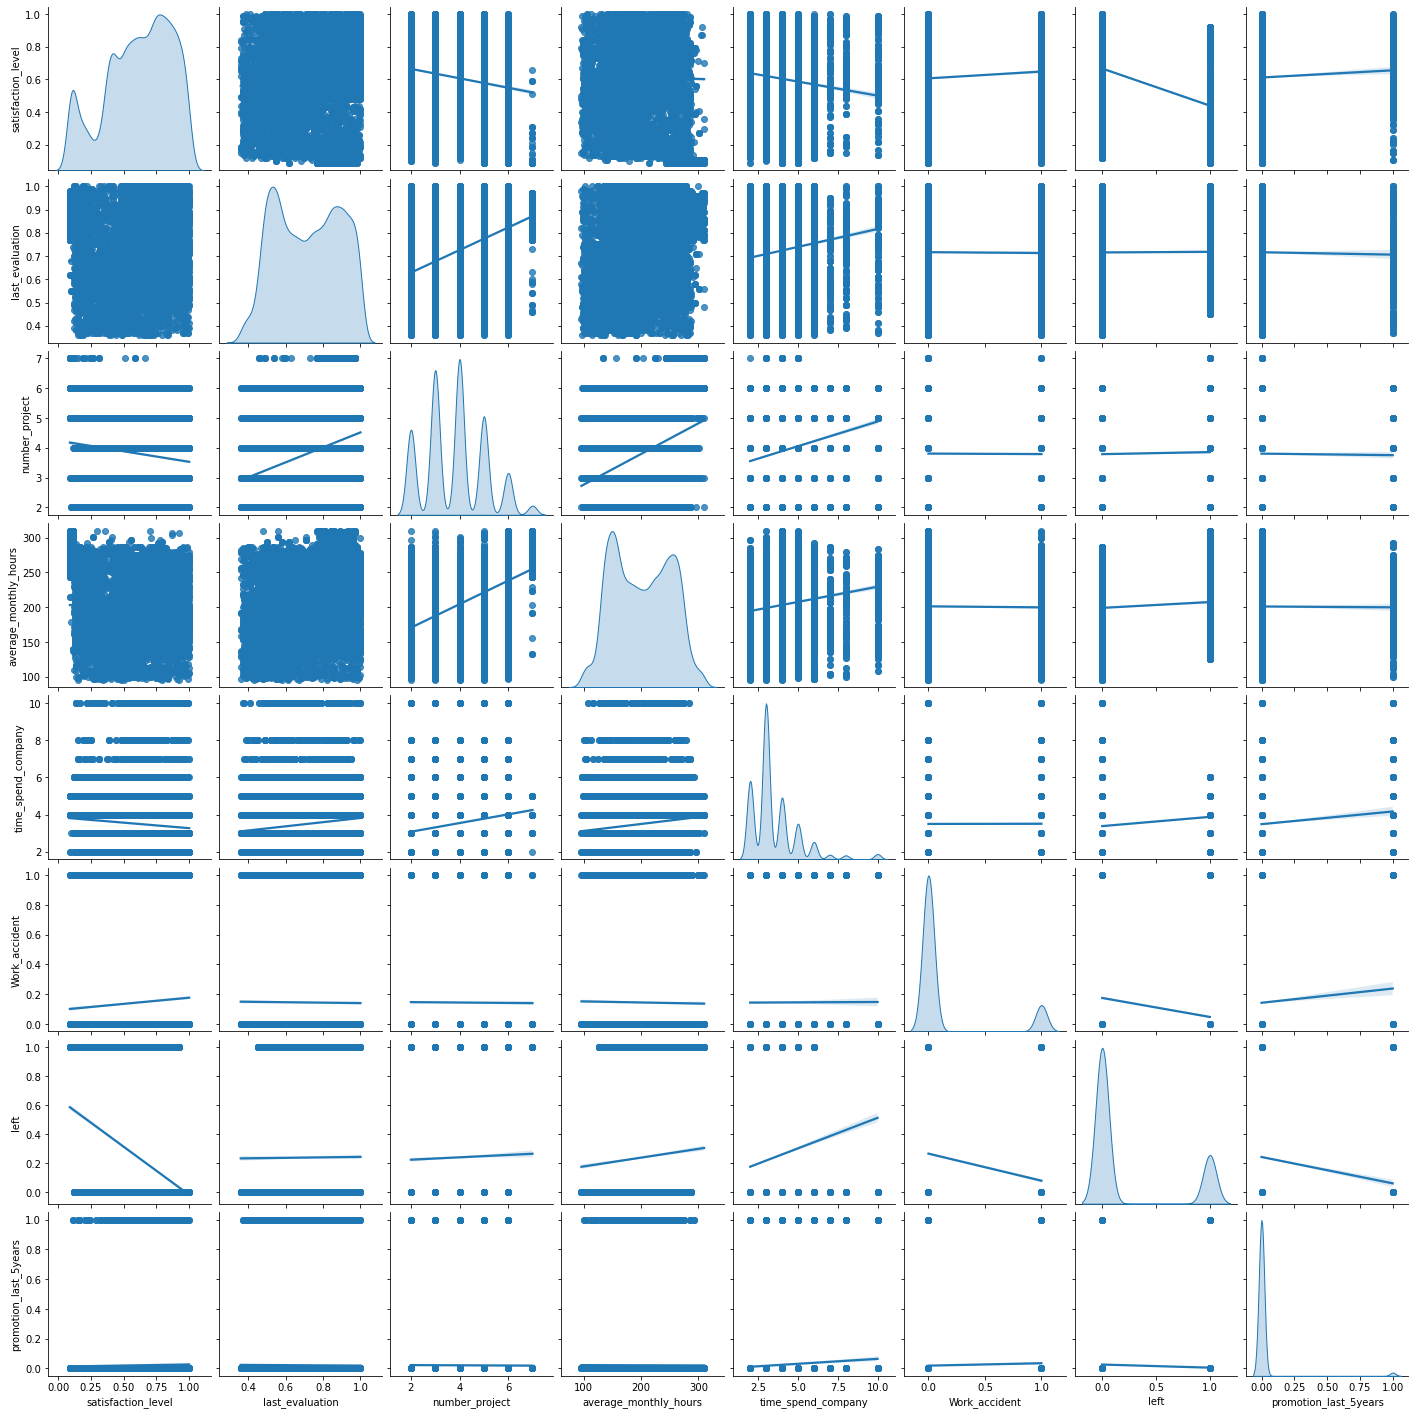

In [208]:
sns.pairplot(df_corr, kind="reg", diag_kind="kde") # => not representitive in our case

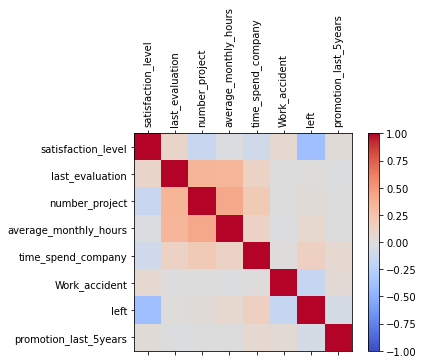

In [7]:
# Let's look at the correlation plot to address potential multicollinearity
corr = df_corr.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

Observations: 
- Majority has high level of satisfacton
- Extra hours were a norm in the company. It is unclear if those extra hours are paid
- On average employee has 3-4 projects
- Majority worked in the company from 2 to 4 years at the moment of research. Maximum: 10 => data period = 10
- Level of accidents wasn't high, however, it is unclear what accident means
- For 10 years 23.8% of all employes left the company 
- Level of promotion is exremely low: just 2.1%
- After 6 years the probability that an employee leaves the company is extremely low
- Majority gets low or medium salary level
- Sales, technical, support and IT are departments with higherst eployees number
- Preliminary correlation analysis: strong negative correlation of satisfaction level, number of projects and decision to leave. Positive correlation of high last evaluation and number of projects and average monthly hours = > The more employees were working, the higher they were evaluated

Potential problems: 
 - multicollinearity of avarage monthly hours and number of projects?
 - the data don't have a Gaussian distribution

### Preparing Data for Analysis

We have categorical variables for "department" and "salary". Let's create dummy variables.

In [76]:
# Convert "department" into dummy variables
df = pd.concat([df, pd.get_dummies(df["department"], prefix="department")], axis=1).drop(columns=["department"])

# Convert "salary" into dummy variables
df = pd.concat([df, pd.get_dummies(df["salary"], prefix="salary")], axis=1).drop(columns=["salary"])

In [77]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [24]:
df.columns

# now our data have 21 columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [47]:
# Check the data balance

# Count the number of churn (=1)
Y.value_counts()

# => unbalanced data, however, it is not going to be addressed within this project

0    11428
1     3571
Name: left, dtype: int64

In [48]:
### Check the churn rate
churn_rate = (sum(df['left'])/len(df['left'].index))*100
churn_rate

23.80825388359224

### OLS Regression

First, let's run simple OLS regression for our data (as a part of seminar task to demonstrate that linear regression is not suitable for approaching this problem)

#### Linear regression on Decision to Leave ("Average monthly hours" are excluded to address multicollinearity)

In [31]:
# Linear regression on Decision to leave
Y = df.left
X = df.drop(['left', 'average_monthly_hours'], axis = 1)


In [34]:
# Standardize the data to the same scale
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']) # new standardized data
X.head(10)

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,-0.936495,-1.087275,-1.462863,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
1,0.752814,0.840707,0.971113,1.713436,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,-0.975824,1.151898
2,-2.022479,0.957554,2.593763,0.343655,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,-0.975824,1.151898
3,0.431041,0.899131,0.971113,1.028546,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
4,-0.976716,-1.145699,-1.462863,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
5,-0.815830,-1.262546,-1.462863,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
6,-2.062701,0.314894,1.782438,0.343655,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
7,1.235474,0.782283,0.971113,1.028546,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
8,1.114809,1.658639,0.971113,1.028546,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
9,-0.775608,-1.087275,-1.462863,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132


=> As it was noted, our data have multicollinearity problem, presumably in last_evaluation, number_project and average_monthly_hours. This problem has to be addressed.

=> (1) Data do not explain the variation in the level of satisfaction. Presumably it is due to the fixed effects.

=> (3) For classification problem ("left") linear regression doesn't suit. However, it is still able to explain 0.211 of data variation (R-squared)

In [35]:
# Split the data into Test and Train

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [36]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (10499, 19)
y_train:  (10499,)
X_test:  (4500, 19)
y_test:  (4500,)


In [37]:
reg = LinearRegression()
reg.fit(X_train,y_train)
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  0.23845336882088658
Model coefficients:  [-1.61063291e-01  2.04215316e-02 -3.21110240e-02  5.50771476e-02
 -5.49074110e-02 -1.34117507e-02  2.92385771e+12  2.37875882e+12
  2.34999044e+12  2.30896542e+12  2.14002572e+12  2.47753131e+12
  2.53630843e+12  4.76903526e+12  3.79477411e+12  4.11056384e+12
  8.19705916e+11  1.48948011e+12  1.47515219e+12]


In [24]:
# Predicting Weights from Train Dataset:
y_head = reg.predict(X_train)

In [38]:
# Using Trained Model and Test Dataset to Estimate Performance:
y_pred = reg.predict(X_test)

# Analysing the Success of the Trained Model from Test Dataset and Predictions:
print(r2_score(y_test, y_pred))

0.2053632089451437


In [43]:
y_pred_df = pd.DataFrame(y_pred, columns=['Fitted Value'])
y_test_df = pd.DataFrame(y_test)
y_test_df = y_test.reset_index(drop=True)
ynew = pd.concat([y_pred_df, y_test_df], axis=1)
ynew = ynew.rename(columns = {"left": "True Value"})
ynew['difference'] = (ynew['True Value']-ynew['Fitted Value'])**2
ynew

,Fitted Value,True Value,difference
0,0.067799,0,0.004597
1,0.149586,0,0.022376
2,-0.017162,0,0.000295
3,0.287281,0,0.082531
4,0.435475,1,0.318689
...,...,...,...
4495,0.249928,0,0.062464
4496,0.319264,1,0.463402
4497,0.597584,1,0.161938
4498,0.334889,0,0.112151


Text(0.5, 0, 'True Value')

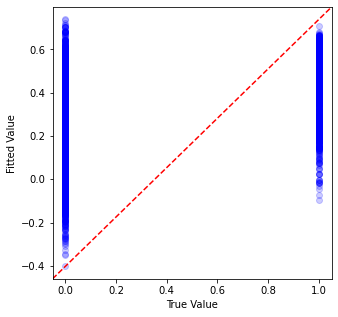

In [45]:
# Visualizing True Value vs. Fitted Value

from sklearn.metrics import median_absolute_error

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(ynew['True Value'], ynew['Fitted Value'], color='blue', alpha=0.2)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
#plt.title('Linear Regression Model for Employee Performance Evaluation')
plt.ylabel('Fitted Value')
plt.xlabel('True Value')

In [46]:
mse = np.mean((ynew['Fitted Value']-ynew['True Value'])**2)
print(mse)

0.1439269308339129


As it was demonstrated, linear regression is not suitable for binary classification problem, because: 
- Problem #1: Predicted value is continuous, not probabilistic
- Problem #2: It is sensitive to imbalance data

# Other ML algorithms

### Logistic regression for Classification purpose (whether an employee will stay at the company) 

In [78]:
# Separate the dataset into features and target
X = df.drop(['left', 'average_monthly_hours'],axis=1)
y = df['left']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y, random_state=101)

# Hold-out validation
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=101)


In [82]:
# Standardize the columns the values of which are out of 0-1 range
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
# Initiate the model
base_lm = LogisticRegression()
# Fit the model
base_lm_model = base_lm.fit(X_train, y_train.ravel()) # Return a contiguous flattened array.
# Make Predictions
base_lm_pred=base_lm_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_lm_accuracy = accuracy_score(y_test, base_lm_pred)
base_lm_precision = precision_score(y_test, base_lm_pred)
base_lm_recall = recall_score(y_test, base_lm_pred)
base_lm_f1 = 2 * (base_lm_precision * base_lm_recall) / (base_lm_precision + base_lm_recall)

# Calculate Predicted Probabilities
base_lm_prob_train = base_lm.predict_proba(X_train)
base_lm_prob_test = base_lm.predict_proba(X_test)

# Calculate AUC score
base_lm_probs = base_lm.predict_proba(X_test)
base_lm_probs = base_lm_probs[:,1]
base_lm_auc = roc_auc_score(y_test, base_lm_probs)

# Display the metrics
print("Logistic Regression")
print(" - Accuracy : ",'{:.3f}'.format(base_lm_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_lm_precision))
print(" - Recall   : ",'{:.3f}'.format(base_lm_recall))
print(" - F1 score : ",'{:.3f}'.format(base_lm_f1))
print(" - AUC score: ",'{:.3f}'.format(base_lm_auc))

# Display the confusion matrix
cm = confusion_matrix(y_test,base_lm_pred)
print("Confusion Matrix")
print(cm)

Logistic Regression
 - Accuracy :  0.792
 - Precision:  0.604
 - Recall   :  0.366
 - F1 score :  0.456
 - AUC score:  0.822
Confusion Matrix
[[3172  257]
 [ 679  392]]


In [211]:
# Using Trained Model and Test Dataset to Estimate Performance:
y_pred = base_lm_model.predict_proba(X_test)
log_y_pred_1 = [item[1] for item in y_pred]

# Analysing the Success of the Trained Model from Test Dataset and Predictions:
print(r2_score(y_test, log_y_pred_1))

0.2267641716776363


In [212]:
print("Logistic regression RMSE: ", mean_squared_error(y_test, log_y_pred_1))

Logistic regression RMSE:  0.14023095688123058


 => Using logistics regression we obtaining pretty high accuracy score, however, precision and recall of the model are low. Probably we can use other methods to improve these indicators.
Moreover, the problem of multicollinearity in linear regression must be solved. 

#### Create the functions for displaying confusion matrix in different formats

In [40]:
# Confusion matrix in absolute numbers

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if i == 0 and j == 0:
                name = "True Negatives"
            elif i == 0 and j == 1:
                name = "False Positives"
            elif i == 1 and j == 1:
                name = "True Positives"
            else:
                name = "False Negatives"
            plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()


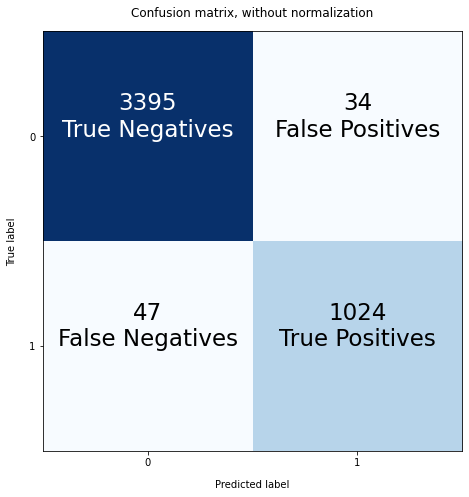

In [201]:
# Compute confusion matrix
class_names = ["stayed", "left"]
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cm, classes = base_lm.classes_ , title='Confusion matrix, without normalization')

In [60]:
# Confusion matrix in relative numbers

def plot_confusion_matrix_norm(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

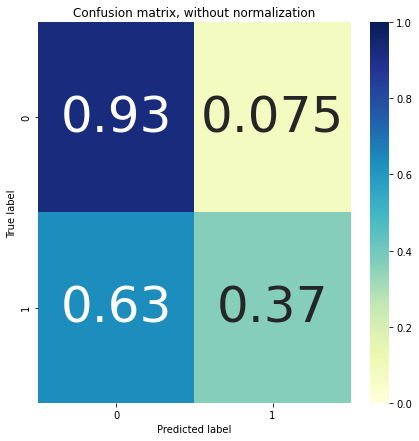

In [61]:
# Normalized Confusion Matrix
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix_norm(cm_norm, classes = base_lm.classes_ , title='Confusion matrix, without normalization')

###  Hyper Parameter Tuning for Logistic Regression


#### Method: Parameters Grid

In [214]:
logModel = LogisticRegression()

In [215]:
# Setting parameters over which the model will optimize

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [216]:
# import Grid Search
from sklearn.model_selection import GridSearchCV

In [221]:
# set up parameters for the classifier 
clf = GridSearchCV(logModel, param_grid = param_grid, scoring = 'recall',cv = 10, verbose=True, n_jobs=-1)

In [222]:
# test the model with different parameters
best_clf = clf.fit(X_train,y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2420 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 6420 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 12778 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:  1.5min finished


In [224]:
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

In [225]:
# Initiate the model with the best parameters
best_lm = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')
best_lm_model = best_lm.fit(X_train, y_train.ravel())

# Make Predictions
best_lm_pred = best_lm_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_lm_accuracy = accuracy_score(y_test, best_lm_pred)
base_lm_precision = precision_score(y_test, best_lm_pred)
base_lm_recall = recall_score(y_test, best_lm_pred)
base_lm_f1 = 2 * (base_lm_precision * base_lm_recall) / (base_lm_precision + base_lm_recall)

# Calculate Predicted Probabilities
base_lm_prob_train = best_lm.predict_proba(X_train)
base_lm_prob_test = best_lm.predict_proba(X_test)

# Calculate AUC score
base_lm_probs = best_lm.predict_proba(X_test)
base_lm_probs = base_lm_probs[:,1]
base_lm_auc = roc_auc_score(y_test, base_lm_probs)

# Display the metrics
print("Logistic Regression")
print(" - Accuracy : ",'{:.3f}'.format(base_lm_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_lm_precision))
print(" - Recall   : ",'{:.3f}'.format(base_lm_recall))
print(" - F1 score : ",'{:.3f}'.format(base_lm_f1))
print(" - AUC score: ",'{:.3f}'.format(base_lm_auc))

# Display the confusion matrix
cm = confusion_matrix(y_test,best_lm_pred)
print("Confusion Matrix")
print(cm)

# Logistic Regression: Imbalanced Data
#  - Accuracy :  0.788
#  - Precision:  0.593
#  - Recall   :  0.354
#  - F1 score :  0.443
#  - AUC score:  0.822
# Confusion Matrix
# [[3169  260]
#  [ 692  379]]


Logistic Regression
 - Accuracy :  0.792
 - Precision:  0.606
 - Recall   :  0.367
 - F1 score :  0.457
 - AUC score:  0.822
Confusion Matrix
[[3173  256]
 [ 678  393]]


### Decision Tree

In [227]:
# Initiate the model
base_tree = DecisionTreeClassifier()
# Fit the model
base_tree_model = base_tree.fit(X_train, y_train.ravel())
# Make Predictions
base_tree_pred=base_tree_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_tree_accuracy = accuracy_score(y_test, base_tree_pred)
base_tree_precision = precision_score(y_test, base_tree_pred)
base_tree_recall = recall_score(y_test, base_tree_pred)
base_tree_f1 = 2 * (base_tree_precision * base_tree_recall) / (base_tree_precision + base_tree_recall)

# Calculate AUC score
base_tree_probs = base_tree.predict_proba(X_test)
base_tree_probs = base_tree_probs[:,1]
base_tree_auc = roc_auc_score(y_test, base_tree_probs)

# Display the metrics
print("Decision Tree Classifier")
print(" - Accuracy : ",'{:.3f}'.format(base_tree_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_tree_precision))
print(" - Recall   : ",'{:.3f}'.format(base_tree_recall))
print(" - F1 score : ",'{:.3f}'.format(base_tree_f1))
print(" - AUC score: ",'{:.3f}'.format(base_tree_auc))

cm = confusion_matrix(y_test,base_tree_pred)
print("Confusion Matrix")
print(cm)


Decision Tree Classifier
 - Accuracy :  0.969
 - Precision:  0.918
 - Recall   :  0.957
 - F1 score :  0.937
 - AUC score:  0.965
Confusion Matrix
[[3337   92]
 [  46 1025]]


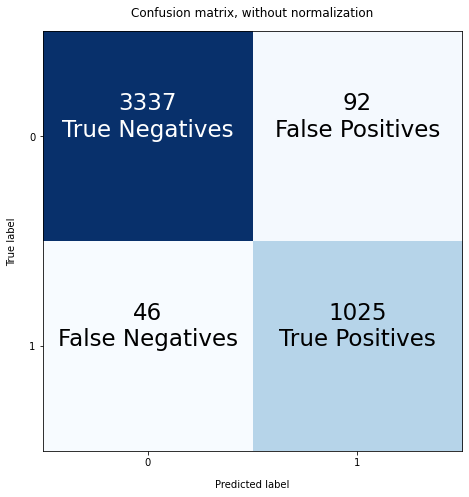

In [228]:
# Compute confusion matrix
class_names = ["stayed", "left"]
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cm, classes = base_lm.classes_ , title='Confusion matrix, without normalization')

#### Hyper parameter tuning for Decision Tree

In [96]:
# Selection of parameters

param_dist = {
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26, 27, 28, 29, 30 ]
}

In [97]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid = param_dist, cv = 10, n_jobs = -1 )


In [98]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30]})

In [99]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [100]:
grid.best_score_

0.97704580325934

In [101]:
# Initiate the model with the best parameters
decision_tree_best = DecisionTreeClassifier(max_depth=8)
best_tree_model = decision_tree_best.fit(X_train, y_train.ravel())

# Make Predictions
best_tree_pred=best_tree_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_tree_accuracy = accuracy_score(y_test, best_tree_pred)
base_tree_precision = precision_score(y_test, best_tree_pred)
base_tree_recall = recall_score(y_test, best_tree_pred)
base_tree_f1 = 2 * (base_tree_precision * base_tree_recall) / (base_tree_precision + base_tree_recall)

# Calculate AUC score
base_tree_probs = grid.predict_proba(X_test)
base_tree_probs = base_tree_probs[:,1]
base_tree_auc = roc_auc_score(y_test, base_tree_probs)

# Display the metrics
print("Decision Tree Classifier: Imbalanced Data")
print(" - Accuracy : ",'{:.3f}'.format(base_tree_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_tree_precision))
print(" - Recall   : ",'{:.3f}'.format(base_tree_recall))
print(" - F1 score : ",'{:.3f}'.format(base_tree_f1))
print(" - AUC score: ",'{:.3f}'.format(base_tree_auc))

cm = confusion_matrix(y_test,base_tree_pred)
print("Confusion Matrix")
print(cm)

# Decision Tree Classifier: 
#  - Accuracy :  0.970
#  - Precision:  0.922
#  - Recall   :  0.954
#  - F1 score :  0.938
#  - AUC score:  0.964
# Confusion Matrix
# [[3342   87]
#  [  49 1022]]

Decision Tree Classifier: Imbalanced Data
 - Accuracy :  0.975
 - Precision:  0.966
 - Recall   :  0.928
 - F1 score :  0.947
 - AUC score:  0.967


NameError: name 'base_tree_pred' is not defined

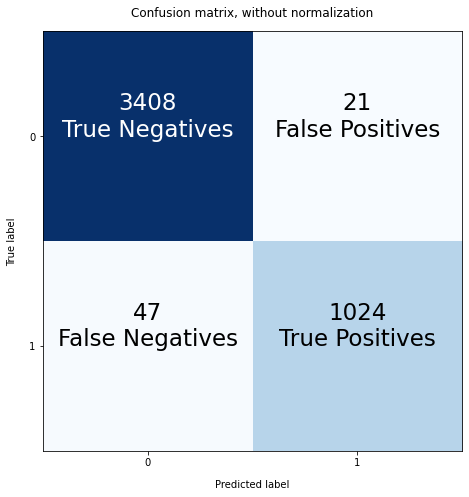

In [102]:
# Compute confusion matrix
class_names = ["stayed", "left"]
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cm, classes = decision_tree_best.classes_ , title='Confusion matrix, without normalization')

### Random Forest

In [41]:
# Initiate the model
base_rfc = RandomForestClassifier()
# Fit the model
base_rfc_model = base_rfc.fit(X_train, y_train.ravel())
# Make Predictions
base_rfc_pred=base_rfc_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_rfc_accuracy = accuracy_score(y_test, base_rfc_pred)
base_rfc_precision = precision_score(y_test, base_rfc_pred)
base_rfc_recall = recall_score(y_test, base_rfc_pred)
base_rfc_f1 = 2 * (base_rfc_precision * base_rfc_recall) / (base_rfc_precision + base_rfc_recall)

# Calculate AUC score
base_rfc_probs = base_rfc.predict_proba(X_test)
base_rfc_probs = base_rfc_probs[:,1]
base_rfc_auc = roc_auc_score(y_test, base_rfc_probs)

# Display the metrics
print("Random Forest Classifier")
print(" - Accuracy : ",'{:.3f}'.format(base_rfc_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_rfc_precision))
print(" - Recall   : ",'{:.3f}'.format(base_rfc_recall))
print(" - F1 score : ",'{:.3f}'.format(base_rfc_f1))
print(" - AUC score: ",'{:.3f}'.format(base_rfc_auc))

cm = confusion_matrix(y_test,base_rfc_pred)
print("Confusion Matrix")
print(cm)

Random Forest Classifier
 - Accuracy :  0.985
 - Precision:  0.981
 - Recall   :  0.956
 - F1 score :  0.968
 - AUC score:  0.991
Confusion Matrix
[[3409   20]
 [  47 1024]]


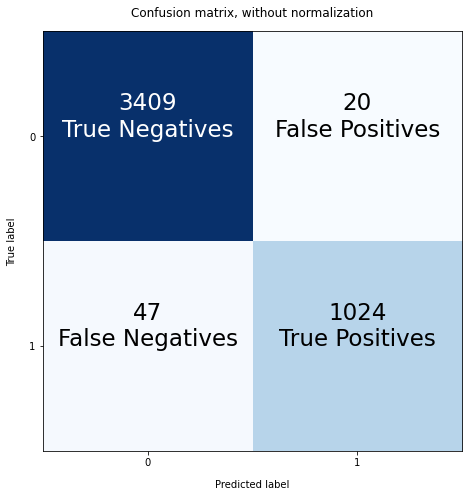

In [43]:
# Compute confusion matrix
class_names = ["stayed", "left"]
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cm, classes = base_rfc.classes_ , title='Confusion matrix, without normalization')

#### Hyper parameter tuning for Random Forest

In [250]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [20,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [251]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [252]:
rf_Model = RandomForestClassifier()

In [253]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [254]:
# Run the model
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 288 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 694 tasks      | elapsed:   44.3s
[Parallel(n_jobs=4)]: Done 1260 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1849 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 2294 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 2821 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  4.0min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [272]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 41}

In [273]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.999
Test Accuracy - : 0.984


In [274]:
rf_Model_best = RandomForestClassifier (criterion = "entropy",bootstrap=True, max_depth= 20, max_features ='sqrt',min_samples_leaf =1,
                                       min_samples_split =2, n_estimators=41)

In [275]:
rf_Model_best_run = rf_Model_best.fit(X_train, y_train.ravel())
# Make Predictions
base_rfc_pred=rf_Model_best_run.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_rfc_accuracy = accuracy_score(y_test, base_rfc_pred)
base_rfc_precision = precision_score(y_test, base_rfc_pred)
base_rfc_recall = recall_score(y_test, base_rfc_pred)
base_rfc_f1 = 2 * (base_rfc_precision * base_rfc_recall) / (base_rfc_precision + base_rfc_recall)

# Calculate AUC score
base_rfc_probs = rf_Model_best_run.predict_proba(X_test)
base_rfc_probs = base_rfc_probs[:,1]
base_rfc_auc = roc_auc_score(y_test, base_rfc_probs)

# Display the metrics
print("Random Forest Classifier")
print(" - Accuracy : ",'{:.3f}'.format(base_rfc_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_rfc_precision))
print(" - Recall   : ",'{:.3f}'.format(base_rfc_recall))
print(" - F1 score : ",'{:.3f}'.format(base_rfc_f1))
print(" - AUC score: ",'{:.3f}'.format(base_rfc_auc))

cm = confusion_matrix(y_test,base_rfc_pred)
print("Confusion Matrix")
print(cm)

# Random Forest Classifier: Imbalanced Data
#  - Accuracy :  0.984
#  - Precision:  0.977
#  - Recall   :  0.954
#  - F1 score :  0.966
#  - AUC score:  0.990
# Confusion Matrix
# [[3405   24]
#  [  49 1022]]

Random Forest Classifier
 - Accuracy :  0.983
 - Precision:  0.977
 - Recall   :  0.952
 - F1 score :  0.965
 - AUC score:  0.990
Confusion Matrix
[[3405   24]
 [  51 1020]]


### XGBoost


In [278]:
# Initiate the model
base_xgb = XGBClassifier()
# Fit the model
base_xgb_model = base_xgb.fit(X_train, y_train)
# Make Predictions
base_xgb_pred = base_xgb_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_xgb_accuracy = accuracy_score(y_test, base_xgb_pred)
base_xgb_precision = precision_score(y_test, base_xgb_pred)
base_xgb_recall = recall_score(y_test, base_xgb_pred)
base_xgb_f1 = 2 * (base_xgb_precision * base_xgb_recall) / (base_xgb_precision + base_xgb_recall)

# Calculate AUC score
base_xgb_probs = base_xgb.predict_proba(X_test)
base_xgb_probs = base_xgb_probs[:,1]
base_xgb_auc = roc_auc_score(y_test, base_xgb_probs)

# Display the metrics
print("XGBoost Classifier")
print(" - Accuracy : ",'{:.3f}'.format(base_xgb_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_xgb_precision))
print(" - Recall   : ",'{:.3f}'.format(base_xgb_recall))
print(" - F1 score : ",'{:.3f}'.format(base_xgb_f1))
print(" - AUC score: ",'{:.3f}'.format(base_xgb_auc))

cm = confusion_matrix(y_test,base_xgb_pred)
print("Confusion Matrix")
print(cm)

[02:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier
 - Accuracy :  0.981
 - Precision:  0.970
 - Recall   :  0.949
 - F1 score :  0.959
 - AUC score:  0.989
Confusion Matrix
[[3398   31]
 [  55 1016]]


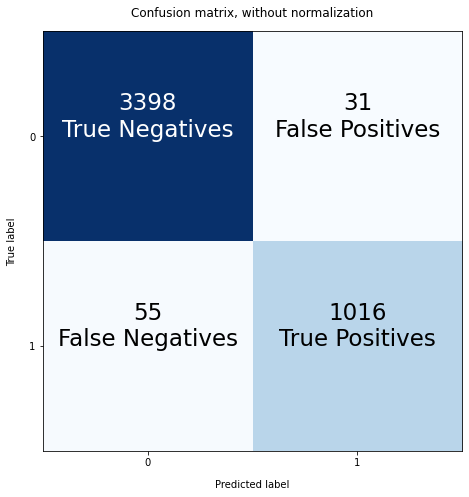

In [82]:
# Compute confusion matrix
class_names = ["stayed", "left"]
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cm, classes = base_lm.classes_ , title='Confusion matrix, without normalization')

#### Hyper parameter tuning for XGBoost

In [279]:
# Parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45] ,
 "max_depth"        : [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26, 27, 28, 29, 30],
 "min_child_weight" : [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26, 27, 28, 29, 30],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ],
 "colsample_bytree" : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5 , 0.6, 0.7, 0.8, 0.9]
    
}

In [280]:
## Hyperparameter optimization using RandomizedSearchCV
## Grid Search takes tremendous amount of time

In [ ]:
# unsuccessful example with Grid Search
# XGB_Grid = GridSearchCV(estimator = classifier, param_grid = params, cv = 10, verbose=2, n_jobs = -1)
# XGB_Grid.fit(X,Y)

In [281]:
classifier= XGBClassifier()

In [282]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,scoring = "recall", n_iter= 10,n_jobs=-1,cv=10,verbose=3)

In [283]:
random_search.fit(X,Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.7s finished


[02:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                                             0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9],
                            

In [284]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.35, max_delta_step=0, max_depth=19,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [285]:
random_search.best_params_

{'min_child_weight': 2,
 'max_depth': 19,
 'learning_rate': 0.35,
 'gamma': 0.0,
 'colsample_bytree': 0.8}

In [286]:
XGB_Model_best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.35, max_delta_step=0, max_depth=19,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [287]:
# Fit the model
best_xgb_model = XGB_Model_best.fit(X_train, y_train)
# Make Predictions
base_xgb_pred = best_xgb_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_xgb_accuracy = accuracy_score(y_test, base_xgb_pred)
base_xgb_precision = precision_score(y_test, base_xgb_pred)
base_xgb_recall = recall_score(y_test, base_xgb_pred)
base_xgb_f1 = 2 * (base_xgb_precision * base_xgb_recall) / (base_xgb_precision + base_xgb_recall)

# Calculate AUC score
base_xgb_probs = best_xgb_model.predict_proba(X_test)
base_xgb_probs = base_xgb_probs[:,1]
base_xgb_auc = roc_auc_score(y_test, base_xgb_probs)

# Display the metrics
print("XGBoost Classifier")
print(" - Accuracy : ",'{:.3f}'.format(base_xgb_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_xgb_precision))
print(" - Recall   : ",'{:.3f}'.format(base_xgb_recall))
print(" - F1 score : ",'{:.3f}'.format(base_xgb_f1))
print(" - AUC score: ",'{:.3f}'.format(base_xgb_auc))

cm = confusion_matrix(y_test,base_xgb_pred)
print("Confusion Matrix")
print(cm)

# - Accuracy :  0.981
# - Precision:  0.970
# - Recall   :  0.949
# - F1 score :  0.959
# - AUC score:  0.989
#Confusion Matrix
#[[3398   31]
# [  55 1016]]

[02:31:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier
 - Accuracy :  0.983
 - Precision:  0.972
 - Recall   :  0.955
 - F1 score :  0.963
 - AUC score:  0.991
Confusion Matrix
[[3399   30]
 [  48 1023]]


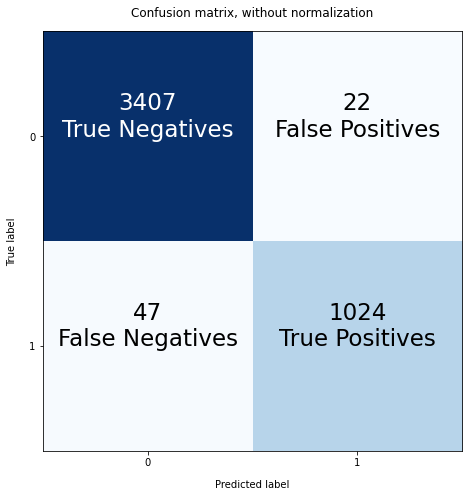

In [295]:
# Compute confusion matrix
class_names = ["stayed", "left"]
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cm, classes = base_lm.classes_ , title='Confusion matrix, without normalization')

## ROC Curve

In [38]:
ns_probs = [0 for _ in range(len(y_test))]

prob_lm = base_lm_model.predict_proba(X_test)
prob_lm = prob_lm[:,1]

#prob_lm_best = best_lm_model.predict_proba(X_test)
#prob_lm_best = prob_lm_best[:,1]

#prob_tree = base_tree_model.predict_proba(X_test)
#prob_tree = prob_tree[:,1]

prob_tree_best = best_tree_model.predict_proba(X_test)
prob_tree_best = prob_tree_best[:,1]

prob_rfc = base_rfc_model.predict_proba(X_test)
prob_rfc = prob_rfc[:,1]

#prob_rfc_best = rf_Model_best_run.predict_proba(X_test)
#prob_rfc_best = prob_rfc_best[:,1]

#prob_xgb = base_xgb_model.predict_proba(X_test)
#prob_xgb = prob_xgb[:,1]

prob_xgb_best = best_xgb_model.predict_proba(X_test)
prob_xgb_best = prob_xgb_best[:,1]

NameError: name 'base_lm_model' is not defined

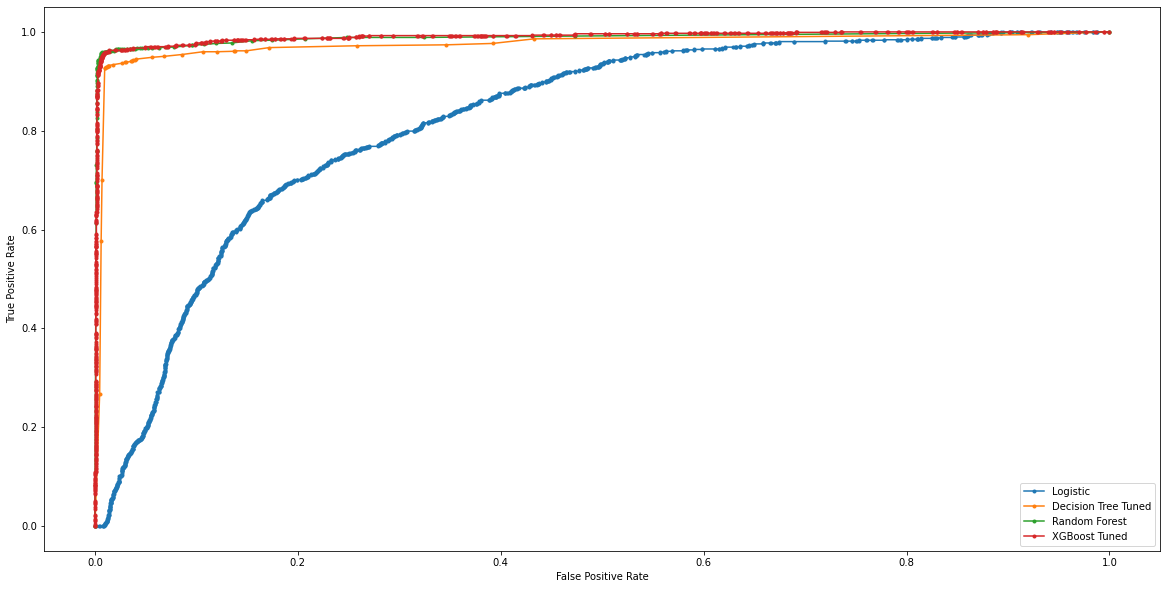

In [293]:
lm_fpr, lm_tpr, _ = roc_curve(y_test, prob_lm)
#lm_fpr_best, lm_tpr_best, _ = roc_curve(y_test, prob_lm_best)
#tree_fpr, tree_tpr, _ = roc_curve(y_test, prob_tree)
tree_fpr_best, tree_tpr_best, _ = roc_curve(y_test, prob_tree_best)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, prob_rfc)
#rfc_fpr_best, rfc_tpr_best, _ = roc_curve(y_test, prob_rfc_best)
#xgb_fpr, xgb_tpr, _ = roc_curve(y_test, prob_xgb)
xgb_fpr_best, xgb_tpr_best, _ = roc_curve(y_test, prob_xgb_best)

plt.figure(figsize=(20, 10))
plt.plot(lm_fpr, lm_tpr, marker='.', label='Logistic')
#plt.plot(lm_fpr_best, lm_tpr_best, marker='.', label='Logistic Tuned')
#plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree')
plt.plot(tree_fpr_best, tree_tpr_best, marker='.', label='Decision Tree Tuned')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
#plt.plot(rfc_fpr_best, rfc_tpr_best, marker='.', label='Random Forest Tuned')
#plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
plt.plot(xgb_fpr_best, xgb_tpr_best, marker='.', label='XGBoost Tuned')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

# Conclusions

- Best models: Random Forest, XGBoost hyper-parameter tuned
- Applying ML the company can identify up to 96% of all employees who are most likely to leave the company so it can undertake particular measures to avoid this scenario
- The algorithms with the highest performance are Random Forest and XGBoost
- If the company wants to be able to identify all employees who are going to leave the company, the company has face high False Positive Rate
- The company can undertake preventive measures in order to reduce staff turnover, e.g.:ensure healthy work-life-balance, avoid to evaluate employees with higher extra hours higher than others

For more detailed analysis please refer to the corresponding presentation